In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data preparation##

In [2]:
df=pd.read_csv('train.csv')
print(df.shape)

(42000, 785)


In [3]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [7]:
X=data[:,1:]
Y=data[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [8]:
split=int(0.8*X.shape[0])
print(split)

33600


In [11]:
X_train=X[:split,:]
Y_train=Y[:split]
X_test=X[split:,:]
Y_test=Y[split:]

##visualise some samples##

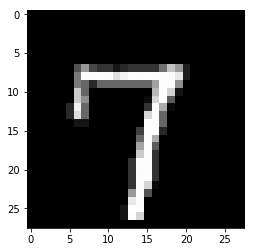

7


In [22]:
def drawimg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawimg(X_train[6])
print(Y_train[6])



In [54]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,querypoint,k=5):
    vals=[]
    new_vals=[]
    m=X.shape[0]
    
    for i in range(m):
        d=dist(querypoint,X[i])
        vals.append((d,Y[i]))
        
    vals=sorted(vals)
    
    vals=vals[:k]
    vals=np.array(vals)
    
    #print(vals)
    
    value=np.unique(vals[:,1],return_counts=True)
    #print(value)
    
    index=value[1].argmax()
    pred=value[0][index]
    
    
    return pred

In [58]:
##prediction

pred=knn(X_train,Y_train,X_test[6])

print("Prediction value is ",end="")
print(int(pred))

Prediction value is 5


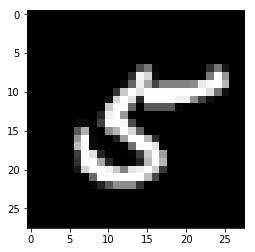

5


In [50]:
drawimg(X_test[6])
print(Y_test[6])